In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(144293, 8)

In [5]:
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [6]:
train_dir ="train"
test_dir = "test"

In [15]:
print("Total number of Rows :",len(train.id))
print("Total number of Files data in CSV :", len(train.groupby('id')))
print("Total Number of files in Train Folder :", len(os.listdir(train_dir)))
print("Total Number of files in Test Folder :", len(os.listdir(test_dir)))

Total number of Rows : 144293
Total number of Files data in CSV : 15594
Total Number of files in Train Folder : 15595
Total Number of files in Test Folder : 5


### EDA

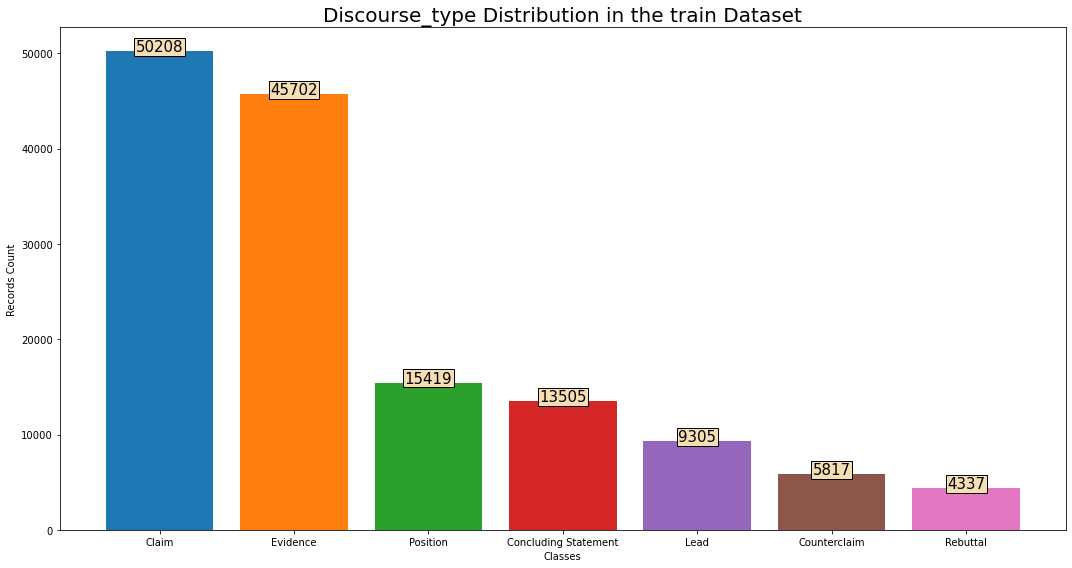

In [20]:
plt.rcParams["figure.figsize"] = (15,8)
plt.title("Discourse_type Distribution in the train Dataset",fontsize=20)
plt.xlabel("Classes")
# plt.xticks(rotation=60)
plt.ylabel("Records Count")
plt.bar(train.discourse_type.value_counts().index,
        train.discourse_type.value_counts(),
        color=plt.rcParams['axes.prop_cycle'].by_key()['color'])# Adding count bar plot 
#Adding count value for each class
for index,data in enumerate(list(train.discourse_type.value_counts())):
  plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha="center",bbox=dict(facecolor='wheat',boxstyle='square',edgecolor='black',pad=0.1))
plt.tight_layout()
plt.show()

<BarContainer object of 44 artists>

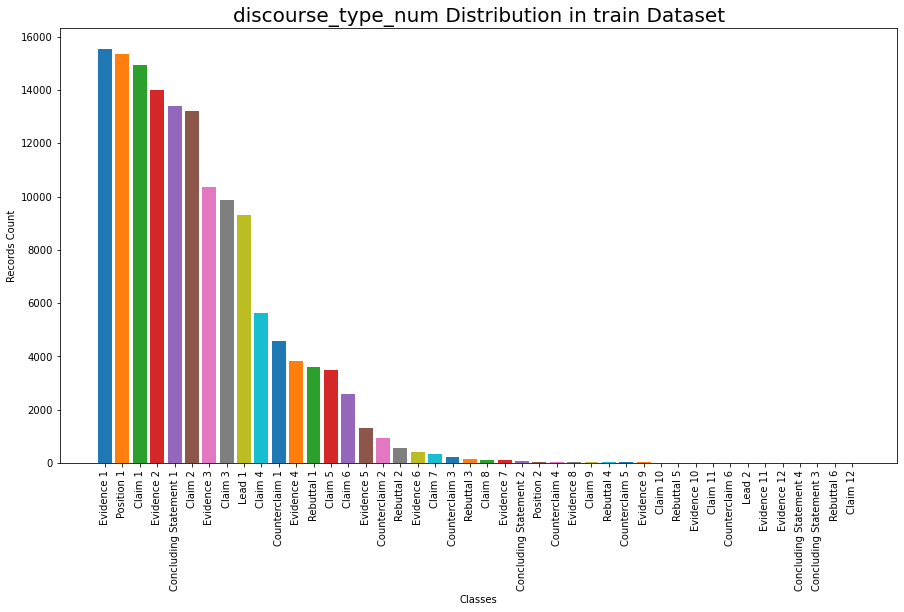

In [22]:
# discourse_type_num
plt.rcParams["figure.figsize"] = (15,8)
plt.title("discourse_type_num Distribution in train Dataset",fontsize=20)
plt.xlabel("Classes")
plt.xticks(rotation=90)
plt.ylabel("Records Count")
plt.bar(train.discourse_type_num.value_counts().index,
        train.discourse_type_num.value_counts(),
        color=plt.rcParams['axes.prop_cycle'].by_key()['color'])

### Computing the length of each document in the train data

In [42]:
file_data =[]
for i in os.listdir(train_dir):
    if i == '.ipynb_checkpoints':
        continue
    data={}
    with open(train_dir+'/'+str(i),'r') as file:
        text_data=file.read()
        data['file_name']=i
        data['text_data']=text_data
    file_data.append(data)  

## Converting Dict to Data Frame
file_df = pd.DataFrame(file_data)
file_df['text_len'] =file_df['text_data'].apply(len)
file_df.head()

,file_name,text_data,text_len
0,3321A3E87AD3.txt,I do agree that some students would benefit fr...,2602
1,DFEAEC512BAB.txt,Should students design a summer project for sc...,2765
2,2E4AFCD3987F.txt,"Dear State Senator\n\n,\n\nIn the ruels of vot...",2035
3,EB6C2AF20BFE.txt,People sometimes have a different opinion than...,3167
4,A91A08E523D5.txt,"Dear senator,\n\nAs you know the Electoral Col...",2952


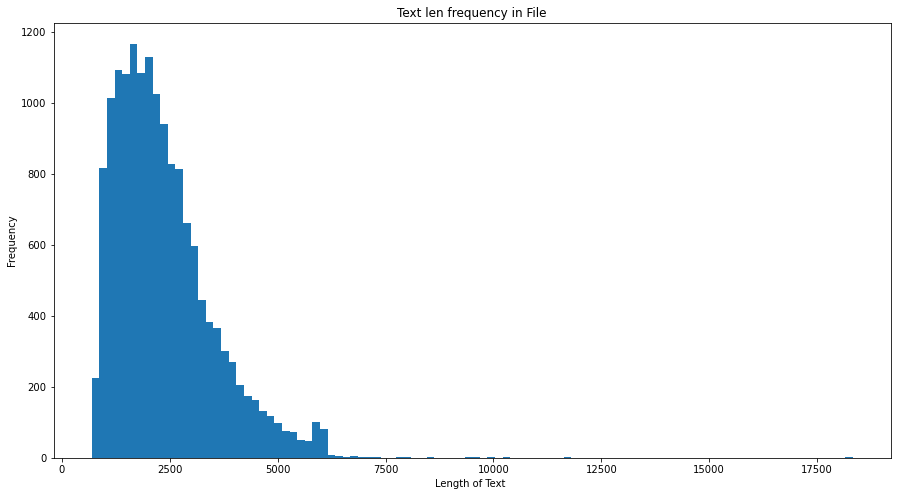

In [43]:
plt.title("Text len frequency in File")
plt.xlabel("Length of Text ")
file_df['text_len'].plot(kind='hist',bins=100)
plt.show()

The document text is coming average words, and on checking a few files manually there are extra space with special HTML character like \xa0 which need to be removed

In [45]:
#Data cleaning
import unicodedata
file_data =[]
for i in os.listdir(train_dir):
  data={}
  if i == '.ipynb_checkpoints':
    continue
  with open(train_dir+'/'+i,'r') as file:
    text_data=file.read()
    data['file_name']=i
    data['text_data']=unicodedata.normalize("NFKD",text_data).strip() # Using this we are removing \xa0  and Strip help to remove extra space
  file_data.append(data)  

## Converting Dict to Data Fram
file_df = pd.DataFrame(file_data)
file_df['text_len'] =file_df['text_data'].apply(len)
file_df.head()

,file_name,text_data,text_len
0,3321A3E87AD3.txt,I do agree that some students would benefit fr...,2602
1,DFEAEC512BAB.txt,Should students design a summer project for sc...,2764
2,2E4AFCD3987F.txt,"Dear State Senator\n\n,\n\nIn the ruels of vot...",2004
3,EB6C2AF20BFE.txt,People sometimes have a different opinion than...,3165
4,A91A08E523D5.txt,"Dear senator,\n\nAs you know the Electoral Col...",2921


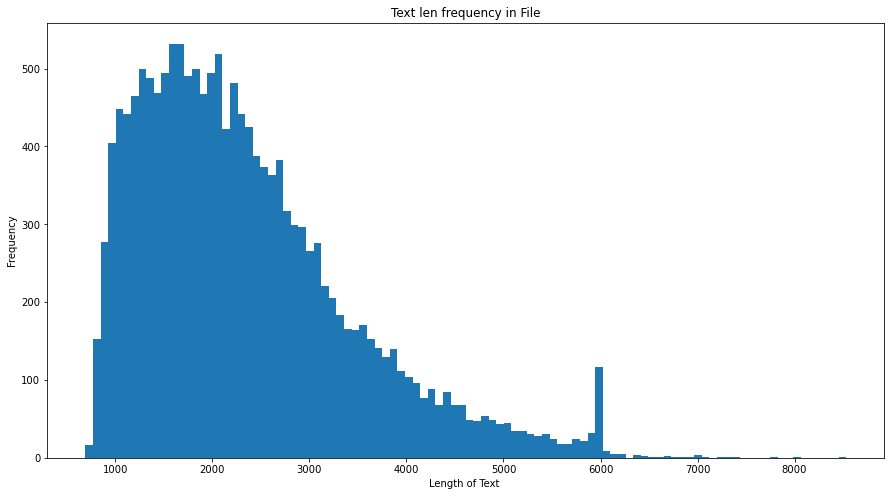

In [46]:
plt.title("Text len frequency in File")
plt.xlabel("Length of Text ")
file_df['text_len'].plot(kind='hist',bins=100)
plt.show()

### Length and Label Comparision

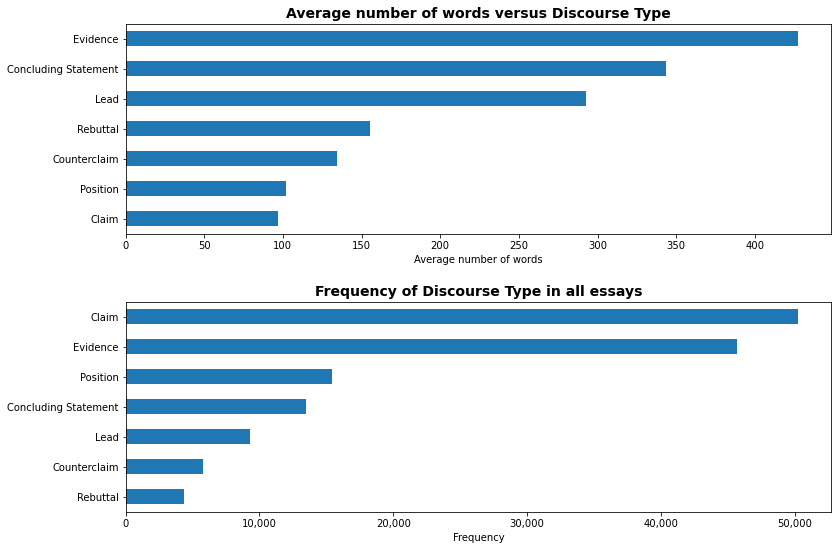

In [49]:
train['discourse_len']=train['discourse_text'].apply(len)

from matplotlib.ticker import FuncFormatter

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1 = train.groupby('discourse_type')['discourse_len'].mean().sort_values().plot(kind="barh")
ax1.set_title("Average number of words versus Discourse Type", 
              fontsize=14, fontweight = 'bold')
ax1.set_xlabel("Average number of words", fontsize = 10)
ax1.set_ylabel("")

ax2 = fig.add_subplot(212)
ax2 = train.groupby('discourse_type')['discourse_type'].count().sort_values().plot(kind="barh")
ax2.get_xaxis().set_major_formatter(FuncFormatter(lambda x, 
                            p: format(int(x), ','))) #add thousands separator
ax2.set_title("Frequency of Discourse Type in all essays", 
              fontsize=14, fontweight = 'bold')
ax2.set_xlabel("Frequency", fontsize = 10)
ax2.set_ylabel("")

plt.tight_layout(pad=2)
plt.show()

### Visualizing the data segments in an essay and its labels

In [52]:
#Getting unique labels
labels = train.discourse_type.unique().tolist()
labels = list(map(str.upper,labels))
print(labels)

['LEAD', 'POSITION', 'EVIDENCE', 'CLAIM', 'CONCLUDING STATEMENT', 'COUNTERCLAIM', 'REBUTTAL']


In [ ]:
import spacy
from spacy import displacy

In [1]:



# def visualize(example):
#     colors = {
#         "LEAD": "#8000FF",
#         "POSITION": "#2B7FF6",
#         "EVIDENCE": "#2ADDDD",
#         'CLAIM': '#80FFB4',
#         'CONCLUDING STATEMENT': 'D4DD80',
#         'COUNTERCLAIM': '#FF8042',
#         'REBUTTAL': '#FF0000'}
    
#     ents = []
#   for i, row in df[df['id'] == example].iterrows():
#       ents.append({
#                       'start': int(row['discourse_start']), 
#                         'end': int(row['discourse_end']), 
#                         'label': row['discourse_type'].upper() #upper case
#                   })
#   with open(train_dir+"/"+example+'.txt', 'r') as file: 
#     data = file.read()
#   doc = {
#       "text": data,
#       "ents": ents,
#       "title": example
#   }
#   options = {"ents": labels, "colors": colors}
#   displacy.render(doc, style="ent", options=options, manual=True, jupyter=True)


In [ ]:
# for i in train['id'].sample(n=1,random_state=10).values.tolist():
#   visualize(i)
#   print("\n\n")
#   print("="*120)